<a href="https://colab.research.google.com/github/kkamal11/MLT/blob/main/Week_1_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week-1




## Dataset

We will be working with a subset of the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [1]:
##### DATASET GENERATION #####
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train[y_train == 2][: 100].reshape(-1, 28 * 28)
test_image = X_test[y_test == 2][0].reshape(28 * 28)
##### DO NOT EDIT THIS CELL #####

11490434/11490434 [==============================] - 0s 0us/step


## Problem-1

How many samples does the dataset have?

In [2]:
# X has shape (n,d) where n is # of samples and and d denotes # of features
print("Number of samples",X.shape[0])
X

Number of samples 100


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

## Problem-2

How many features does the dataset have?

In [3]:
# Enter your solution here
print("Number of features",X.shape[1])

Number of features 784


## Problem-3

Each sample corresponds to an image of dimension $28 \times 28$. Visualize one of these images using the `matplotlib` library. 

- You need to know how to reshape a feature vector. Refer to week-0 content for the same.
- You can refer to the following [document](https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py) for plotting NumPy arrays as images using `matplotlib`.

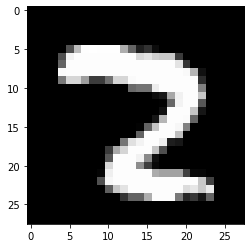

In [29]:
from matplotlib import pyplot as plt

#Take any sample from the dataset say we take the first sample below
sample1 = X[3]

#Reshape it into desired dimension as to plot image we need 2 dimensions
reshaped_sample = np.reshape(sample1,(28,28))

img = plt.imshow(reshaped_sample,cmap='gray')

plt.show()


## Problem-4

Center the the dataset $\mathbf{X}$ around its mean. Call this centered dataset $\mathbf{X}^{\prime}$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n \cdot d} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{d} (X_{ij}^{\prime})^2}
$$

In [5]:
# Enter your solution here

n, d = X.shape[0], X.shape[1]

centered_X = X - X.mean(axis=0)

sum_ = 0
for i in range(n):
  for j in range(d):
    sum_ += centered_X[i][j]**2
    
sum_ = ((centered_X)**2).sum()

ans = (1/(n*d))*np.sqrt(sum_)

print(f"{ans:.2f}")


0.23


In [8]:
import numpy as np
x = np.array([[1,2,3],[4,5,6]])
print((x-x.mean()).sum())

0.0


## Problem-5

Compute the covariance matrix $\mathbf{C}$ of the centered dataset.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{d^2} \sqrt{\sum \limits_{i = 1}^{d} \sum \limits_{j = 1}^{d} C_{ij}^2}
$$

In [9]:
# Enter your solution here
cov_mat = (centered_X.T @ centered_X)/n
np.sqrt((cov_mat**2).sum())/d**2

1.3648061009232249

## Problem-6

Compute the first and second principal components of the dataset, $\mathbf{w}_1$ and $\mathbf{w}_2$.

<u>Conversion</u>

Compute:
$$
\mathbf{w} = \mathbf{w}_1 + \mathbf{w}_2
$$

Enter the following quantity as your answer correct to two decimal places:

$$
\left| \sum \limits_{i = 1}^{d} w_i \right|
$$

In [35]:
# Enter your solution here
eigen_val, eigen_vec = np.linalg.eigh(cov_mat)
w1, w2 = eigen_vec[:,-1],eigen_vec[:,-2]
w = w1 + w2
print(round(w.sum(),2))

1.05


## Problem-7

Visualize the first principal component as an image.

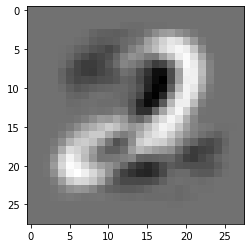

In [37]:
# Enter your solution here
# img = plt.imshow(w1.reshape(28,28))
img = plt.imshow(w1.reshape(28,28),cmap='gray')

plt.show()

## Problem-8

Find the smallest value of $k$ for which the first $k$ principal components capture at least $95\%$ of the variance in the data.

In [25]:
# Enter your solution here
sorted_eigen_value = sorted(eigen_val,reverse=True)

sum_of_eigen_values = np.sum(sorted_eigen_value)
for i in range(len(sorted_eigen_value)):
  ratio = np.sum(sorted_eigen_value[:i])/sum_of_eigen_values
  if ratio >= 0.95:
    break
print(i)

53


## Problem-9

Given a `test_image`, visualize the proxies  by reconstructing it using the top $k$ principal components. Consider four values of $k$; values of $k$ for which the top-$k$ principal components explain:

- 20% of the variance
- 50% of the variance
- 80% of the variance
- 95% of the variance



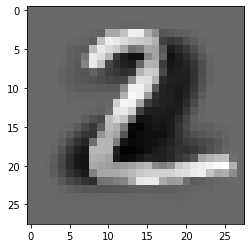

In [46]:
# The test image is
centered_test_image = test_image - X.mean(axis=0)
plt.imshow(centered_test_image.reshape((28,28)), cmap='gray')  
plt.show()

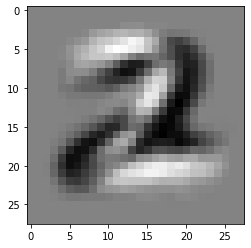

In [47]:
recon = np.zeros(784)
for i in range(5):
  recon += (centered_test_image @ eigen_vec[:,-1-i])*eigen_vec[:,-1-i] #(X.Tw)w

plt.imshow(recon.reshape((28,28)),cmap='gray')
plt.show()